<a href="https://colab.research.google.com/github/GauthamRajgopal/Deep-Learning/blob/master/DeepLearning_MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTRODUCTION-

**Deep learning**: One of the machine learning technique that learns features directly from data.
These machine learning techniques focus on building Artificial Neural Networks (ANN) using several hidden layers. Using different weights, biases, # of neurons, activation functions ( Relu, Sigmoid..) and optimizers (SGD, Adam) etc. the Deep Neural Networks tries to come out with the best possible outcome for the given problem.



**Why deep learning**: When the amounth of data is increased, machine learning techniques are insufficient in terms of performance and deep learning gives better performance like accuracy.

In [7]:
from IPython.display import Image
Image(url='https://image.ibb.co/kO18iH/1.png')

**What is amounth of big**: It is hard to answer but intuitively 1 million sample is enough to say "big amounth of data"

**Usage fields of deep learning**: Speech recognition, image classification, natural language procession (nlp) or recommendation systems

**What is difference of deep learning from machine learning:**
Machine learning covers deep learning.
Features are given machine learning manually.
On the other hand, deep learning learns features directly from data

In [2]:
from IPython.display import Image
Image(url= "https://image.ibb.co/cocncc/2.png")

**How Deep Learning works** -The magic in deep learning networks is discovering the pattern and structure behind vast amounts of data. The computational model consists of multiple layers, called neural networks, where data is processed.*

**What happens in neural networks**

We have 3 elements in the neural network: the input layer, which is the data we want to analyze. At least 2 hidden layers, or nodes, which complete the computation with the deep learning algorithm. In the output layer, we have the calculated result.

In [12]:
from IPython.display import Image
Image(url='https://i1.wp.com/cdn-images-1.medium.com/max/800/1*r0fxAZRpRGapPnC4bniDiQ.png?resize=690%2C259&ssl=1')

**What is the deep learning algorithm doing**-In 2 words: correlation and reduction.

The algorithm finds information which is similar to one another while getting rid of information which is irrelevant. The layers combine information they receive about the data from the previous layer, define it as relevant or irrelevant, and send the relevant outcome to the next node. Irrelevant information is discarded, thus the information reduced. If the information is undefined it remains relevant.

Let’s say for example that we have a deep learning algorithm to find cats in pictures. When I insert this cat picture, the deep learning algorithm will analyze it pixel by pixel. Some nodes initially will see long green lines, and define them as long green lines. In the next layer, the node receives many descriptions as long green lines. This node will define this feature as grass and realize this is irrelevant to find cats and discards it.

**Start Python and Check Versions**
It is a good idea to make sure your Python environment was installed successfully and is working as expected.

In [9]:
# Check Python Version
import sys
sys.version
sys.version_info
import platform
print(platform.python_version())

3.6.8


**Keras** -Modular, powerful and intuitive Deep Learning python library built on Theano
and TensorFlow,

It allows you to define and train neural network models in just a few lines of code.

**Sequential** allows us to build NNs like legos, by adding
one layer on top of the other, swapping layers in and out

In [10]:
# Check Keras and Tensorflow environment
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

tensorflow: 1.14.0
keras: 2.2.5


Using TensorFlow backend.


In [0]:
# import libaries
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM, Dropout, advanced_activations
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,accuracy_score,f1_score
%matplotlib inline
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
# Import data
df = pd.read_csv('mnist_test.csv')
 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
 
# Investigate Data
type(df)
df.size
df.shape
df.head()
df.tail()

pandas.core.frame.DataFrame

7850000

(10000, 785)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
9995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
9996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
9998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
9999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


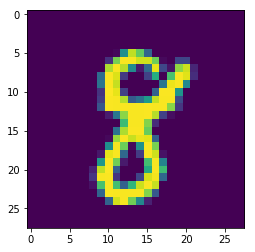

In [0]:
sample_row=0

sample_row=df.iloc[sample_row,:-1]
transformed_row=sample_row.values.reshape(28,28)

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(transformed_row)
plt.show();


In [0]:
# Create Features and Labels and Standardize data
Y = df.loc[:,'label']
X= df.iloc[:,0:784]
std = StandardScaler()
X_Features= std.fit_transform(X)

In [0]:
# Create train and test data 75% and 25% split
train_x, test_x, train_y, test_y = train_test_split(X_Features, Y, test_size=0.15, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(8500, 784)

(1500, 784)

(8500,)

(1500,)

numpy.ndarray

**Define Keras Model**-Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network architecture

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to 784 for the 784 input variables.

Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

We will use the rectified linear unit activation function referred to as ReLU on the first two layers and the softmax function in the output layer.



**We can piece it all together by adding each layer:**

The model expects rows of data with 784 variables (the input_dim=784 argument)

The first hidden layer has 512 nodes and uses the relu activation function.

The second hidden layer has 256 nodes and uses the relu activation function.

The Third hidden layer has 128 nodes and uses the relu activation function.

The Fourth hidden layer has 64 nodes and uses the relu activation function.

The output layer has 10 node and uses the softmax activation function.

**Compile Keras Model**-Now that the model is defined, we can compile it.
When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.

We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use "sparse_categorical_crossentropy" as the loss argument.  We can learn choosing loss functions appropriate to our problem here:
[How to Choose Loss Functions When Training Deep Learning Neural Networks](https://https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems. To learn more about the Adam version of stochastic gradient descent see the post:[Gentle Introduction to the Adam Optimization Algorithm for Deep Learning](https://https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

Finally, will collect and report the classification accuracy, defined via the metrics argument.

In [0]:
# Build Deep Learning Model
model = Sequential()
model.add(Dense(512, input_dim =784))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
train_x = np.array(train_x)
train_y = np.array(train_y)

**Fit Keras Model**
We can train or fit our model on our loaded data by calling the fit() function on the model.

Training occurs over epochs and each epoch is split into batches.

**Epoch**: One pass through all of the rows in the training dataset.
**Batch**: One or more samples considered by the model within an epoch before weights are updated.

For this problem, we will run for a small number of epochs (15) and use a relatively small batch size of 60. This means that each epoch will involve (15/60) 0.25 updates to the model weights.

In [0]:
# Fit the model
model.fit(train_x,train_y, epochs=15, batch_size = 60)

Epoch 1/15
8500/8500 [==============================] - 2s 211us/step - loss: 0.7807 - acc: 0.7545
Epoch 2/15
8500/8500 [==============================] - 1s 111us/step - loss: 0.3051 - acc: 0.9116
Epoch 3/15
8500/8500 [==============================] - 1s 113us/step - loss: 0.2092 - acc: 0.9376
Epoch 4/15
8500/8500 [==============================] - 1s 111us/step - loss: 0.1647 - acc: 0.9536
Epoch 5/15
8500/8500 [==============================] - 1s 111us/step - loss: 0.1244 - acc: 0.9629
Epoch 6/15
8500/8500 [==============================] - 1s 113us/step - loss: 0.1012 - acc: 0.9695
Epoch 7/15
8500/8500 [==============================] - 1s 112us/step - loss: 0.0893 - acc: 0.9727
Epoch 8/15
8500/8500 [==============================] - 1s 113us/step - loss: 0.0903 - acc: 0.9731
Epoch 9/15
8500/8500 [==============================] - 1s 111us/step - loss: 0.0927 - acc: 0.9759
Epoch 10/15
8500/8500 [==============================] - 1s 109us/step - loss: 0.0835 - acc: 0.9781
Epoch 11/

**Evaluate Keras Model**
You can evaluate your model on your training dataset using the evaluate() function on your model and pass it the same input and output used to train the model.

The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset. We are only interested in reporting the accuracy, so we will ignore the loss value

In [0]:
# evaluate the model
scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1500/1500 [==============================] - 0s 259us/step

acc: 95.80%
